## Fastai Lesson 3

In [1]:
from fastai.vision.all import *
from utils import *

### Mnist workout

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [4]:
print((path/'train').ls())
print();
print((path/'valid').ls())

[Path('/root/.fastai/data/mnist_sample/train/7'), Path('/root/.fastai/data/mnist_sample/train/3')]

[Path('/root/.fastai/data/mnist_sample/valid/7'), Path('/root/.fastai/data/mnist_sample/valid/3')]


In [5]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()


In [6]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [7]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [8]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4: 15, 4: 15])
df.style.set_properties(**{'font-size': '10pt', 'background-color': 'red', 
                          'color':'red',
                          'align': 'center'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254
2,0,0,0,48,166,224,253,253,234,196,253
3,0,93,244,249,253,187,46,10,8,4,10
4,0,107,253,253,230,48,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43
6,0,0,0,0,0,0,0,0,0,0,249
7,0,0,0,0,0,0,0,14,101,223,253
8,0,0,0,0,0,11,166,239,253,253,253
9,0,0,0,0,0,16,248,250,253,253,253


In [10]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [11]:
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(sevens_tensors), len(three_tensors), sevens_tensors[1].shape

(6265, 6131, torch.Size([28, 28]))

<AxesSubplot:>

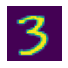

In [12]:
show_image(three_tensors[1])

In [17]:
print(three_tensors[1].shape)
print(type(three_tensors))

torch.Size([28, 28])
<class 'list'>


In [14]:
torch.stack?

In [19]:
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [22]:
print(stacked_sevens.shape)
print(stacked_sevens.dim())

torch.Size([6265, 28, 28])
3


<AxesSubplot:>

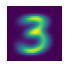

In [95]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<AxesSubplot:>

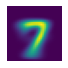

In [94]:
mean7 = stacked_sevens.mean(0)
show_image(stacked_sevens.mean(0))

In [30]:
np.stack?

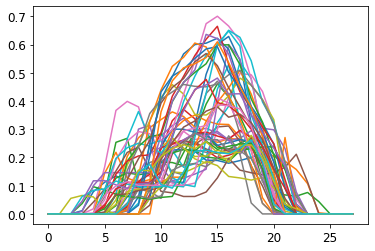

In [37]:
import matplotlib.pyplot as plt

for i in range(0, 50):
    plt.plot(stacked_sevens[i].mean(0))

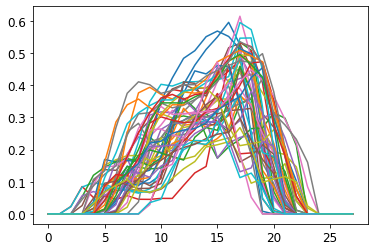

In [38]:
for i in range(0, 50):
    plt.plot(stacked_threes[i].mean(0))

<AxesSubplot:>

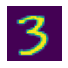

In [39]:
a_3 = stacked_threes[1]
show_image(a_3)

In [48]:
distance_3_abs = (a_3 - a_3.mean(0)).abs().mean()
distance_3_sqt = (a_3 - a_3.mean(0)**2).mean().sqrt()

distance_3_abs, distance_3_sqt

(tensor(0.1718), tensor(0.3107))

In [97]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [61]:
data = [[1,2,3], [4,5,6]]

arr = array(data)
tns = tensor(data)

arr, tns

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [62]:
tns[1]

tensor([4, 5, 6])

In [70]:
tns[:, 0:2]

tensor([[1, 2],
        [4, 5]])

In [75]:
t = tns[:, 0:2] * 10
t

tensor([[10, 20],
        [40, 50]])

In [79]:
valid_3_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_3_tns = valid_3_tns.float()/255

valid_7_tns = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_7_tns = valid_7_tns.float()/255

In [100]:
valid_3_tns.shape

torch.Size([1010, 28, 28])

In [101]:
mean3.shape

torch.Size([28, 28])

In [99]:
def mnist_distance(a, b): return (a-b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [98]:
valid_dist_3 = mnist_distance(valid_3_tns, mean3)
valid_dist_3, valid_dist_3.shape

(tensor([0.1251, 0.1153, 0.1232,  ..., 0.1413, 0.1197, 0.1300]),
 torch.Size([1010]))

In [103]:
tensor([1,2,3]) + tensor([1,1,1]) #element wise operation

tensor([2, 3, 4])

In [104]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [106]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [107]:
is_3(valid_3_tns)

tensor([True, True, True,  ..., True, True, True])

In [109]:
accuracy_3 = is_3(valid_3_tns).float().mean()
accuracy_7 = 1 - is_3(valid_7_tns).float().mean()

In [110]:
accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.9854))

# Sgd